# Torchvision Transforms 视觉效果展示

本notebook展示了torchvision.transforms中各种图像变换的视觉效果，使用CIFAR10数据集作为示例。

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子
torch.manual_seed(42)
np.random.seed(42)

In [2]:
# 加载CIFAR10数据集
data_dir = '/work/home/maben/project/blue_whale_lab/projects/pareto_ebm/datasets'

# 基础变换（只进行ToTensor）
transform_basic = transforms.Compose([
    transforms.ToTensor()
])

# 加载数据集
cifar10_dataset = torchvision.datasets.CIFAR10(
    root=data_dir, 
    train=True, 
    download=False, 
    transform=transform_basic
)

# 获取一些样本
sample_indices = [0, 100, 200, 300, 400]
samples = []
labels = []

for idx in sample_indices:
    img, label = cifar10_dataset[idx]
    samples.append(img)
    labels.append(label)

# CIFAR10类别名称
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"加载了 {len(samples)} 个样本")
for i, label in enumerate(labels):
    
    print(f"样本 {i}: {class_names[label]}")

加载了 5 个样本
样本 0: frog
样本 1: ship
样本 2: frog
样本 3: bird
样本 4: bird


原始CIFAR10样本:


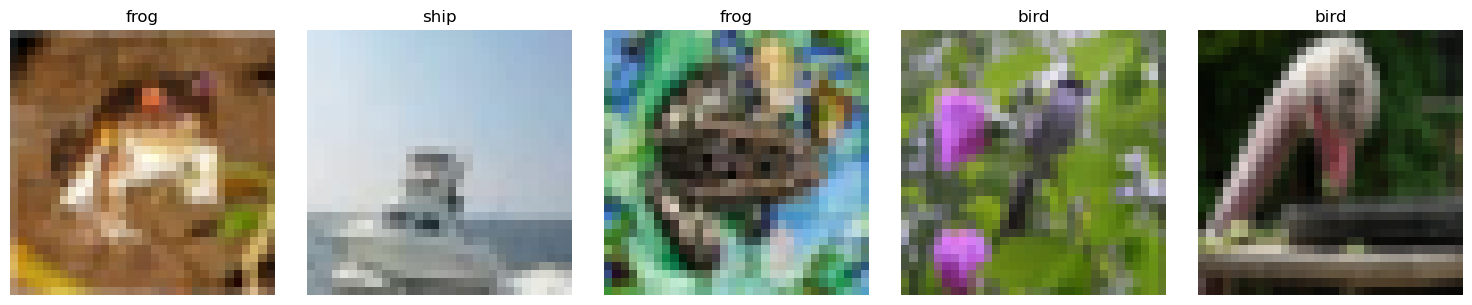

In [3]:
# 辅助函数：显示图像
def show_images(images, titles, figsize=(15, 3)):
    """显示多张图像"""
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    if len(images) == 1:
        axes = [axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        # 如果是tensor，转换为numpy
        if torch.is_tensor(img):
            img = img.permute(1, 2, 0).numpy()
            # 如果是归一化的图像，反归一化
            if img.max() <= 1.0:
                img = np.clip(img, 0, 1)
        
        axes[i].imshow(img)
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# 显示原始样本
print("原始CIFAR10样本:")
show_images(samples, [f"{class_names[label]}" for label in labels])

## 1. 基础变换 (Basic Transforms)

In [6]:
# 1.1 ToTensor
print("1.1 ToTensor 变换:")
print("将PIL图像或numpy数组转换为tensor，并将像素值从[0,255]归一化到[0,1]")

# 获取原始PIL图像
original_pil,_ = cifar10_dataset[sample_indices[0]]
print(f"原始PIL图像形状: {original_pil.shape}, 数据类型: {original_pil.dtype}")

tensor_img = samples[0]
print(f"ToTensor后形状: {tensor_img.shape}, 数据类型: {tensor_img.dtype}")
print(f"像素值范围: [{tensor_img.min():.3f}, {tensor_img.max():.3f}]")

1.1 ToTensor 变换:
将PIL图像或numpy数组转换为tensor，并将像素值从[0,255]归一化到[0,1]
原始PIL图像形状: torch.Size([3, 32, 32]), 数据类型: torch.float32
ToTensor后形状: torch.Size([3, 32, 32]), 数据类型: torch.float32
像素值范围: [0.000, 1.000]


1.2 Normalize 变换:
对tensor进行标准化，通常用于深度学习模型
标准化后像素值范围: [-1.000, 1.000]


/tmp/ipykernel_390402/3846793707.py:20: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_390402/3846793707.py:20: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_390402/3846793707.py:20: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_390402/3846793707.py:20: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_390402/3846793707.py:20: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_390402/3846793707.py:20: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
/work/home/maben/software/anaconda3/envs/diffusion/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

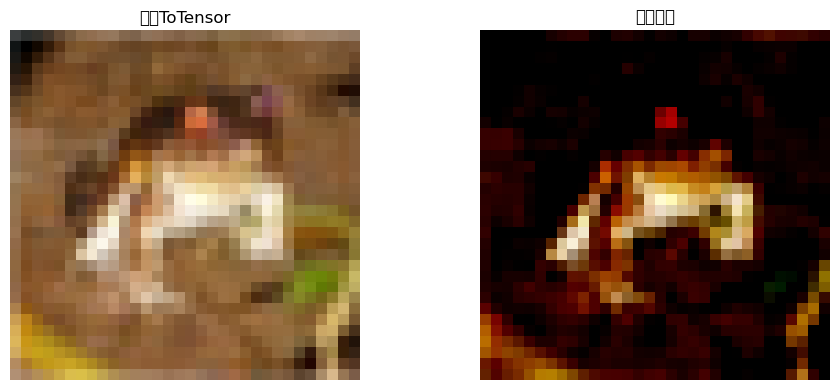

In [10]:
# 1.2 Normalize
print("1.2 Normalize 变换:")
print("对tensor进行标准化，通常用于深度学习模型")

normalize_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

normalized_samples = []
for idx in sample_indices:
    img = cifar10_dataset.data[idx]
    normalized_img = normalize_transform(img)
    normalized_samples.append(normalized_img)

print(f"标准化后像素值范围: [{normalized_samples[0].min():.3f}, {normalized_samples[0].max():.3f}]")

# 显示对比
comparison_images = [samples[0], normalized_samples[0]]
comparison_titles = ["原始ToTensor", "标准化后"]
show_images(comparison_images, comparison_titles, figsize=(10, 4))

## 2. 几何变换 (Geometric Transforms)

In [21]:
# 2.1 Resize
print("2.1 Resize 变换:")
print("调整图像大小")

resize_transforms = [
    transforms.ToTensor(),
    transforms.Resize(64),  # 调整到64x64
    transforms.Resize((128, 128)),  # 调整到128x128
    transforms.Resize(256, antialias=True)  # 调整到256x256，使用抗锯齿
]

resized_samples = []
for transform in resize_transforms:
    full_transform = transforms.Compose([transform, transforms.ToTensor()])

    img = cifar10_dataset.data[1]
    print(img.shape)
    print(type(img))
    resized_img = full_transform(img)
    resized_samples.append(resized_img)

resize_titles = ["64x64", "128x128", "256x256"]
show_images(resized_samples, resize_titles, figsize=(15, 4))

2.1 Resize 变换:
调整图像大小
(32, 32, 3)
<class 'numpy.ndarray'>


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [16]:
# 2.2 RandomCrop
print("2.2 RandomCrop 变换:")
print("随机裁剪，常用于数据增强")

random_crop_transform = transforms.Compose([
    transforms.RandomCrop(24),  # 从32x32裁剪到24x24
    transforms.ToTensor()
])

crop_samples = []
for _ in range(5):  # 生成5个不同的随机裁剪
    img = cifar10_dataset.data[sample_indices[0]]
    crop_img = random_crop_transform(img)
    crop_samples.append(crop_img)

crop_titles = [f"随机裁剪 {i+1}" for i in range(5)]
show_images(crop_samples, crop_titles, figsize=(20, 3))

2.2 RandomCrop 变换:
随机裁剪，常用于数据增强


TypeError: Unexpected type <class 'numpy.ndarray'>

In [ ]:
# 2.3 RandomHorizontalFlip
print("2.3 RandomHorizontalFlip 变换:")
print("随机水平翻转，概率为0.5")

flip_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),  # 强制翻转以展示效果
    transforms.ToTensor()
])

flip_samples = []
for idx in sample_indices[:3]:
    img, _ = cifar10_dataset.dataset[idx]
    flip_img = flip_transform(img)
    flip_samples.append(flip_img)

flip_titles = [f"水平翻转 - {class_names[labels[i]]}" for i in range(3)]
show_images(flip_samples, flip_titles, figsize=(15, 4))

In [ ]:
# 2.4 RandomRotation
print("2.4 RandomRotation 变换:")
print("随机旋转图像")

rotation_transforms = [
    transforms.RandomRotation(degrees=15),  # ±15度
    transforms.RandomRotation(degrees=45),  # ±45度
    transforms.RandomRotation(degrees=90)   # ±90度
]

rotation_samples = []
for transform in rotation_transforms:
    full_transform = transforms.Compose([transform, transforms.ToTensor()])
    img, _ = cifar10_dataset.dataset[sample_indices[0]]
    rotated_img = full_transform(img)
    rotation_samples.append(rotated_img)

rotation_titles = ["±15度旋转", "±45度旋转", "±90度旋转"]
show_images(rotation_samples, rotation_titles, figsize=(15, 4))

## 3. 颜色变换 (Color Transforms)

In [ ]:
# 3.1 RandomGrayscale
print("3.1 RandomGrayscale 变换:")
print("随机转换为灰度图像")

grayscale_transform = transforms.Compose([
    transforms.RandomGrayscale(p=1.0),  # 强制转换为灰度
    transforms.ToTensor()
])

grayscale_samples = []
for idx in sample_indices[:3]:
    img, _ = cifar10_dataset.dataset[idx]
    gray_img = grayscale_transform(img)
    grayscale_samples.append(gray_img)

grayscale_titles = [f"灰度图 - {class_names[labels[i]]}" for i in range(3)]
show_images(grayscale_samples, grayscale_titles, figsize=(15, 4))

In [ ]:
# 3.2 ColorJitter
print("3.2 ColorJitter 变换:")
print("随机调整亮度、对比度、饱和度和色调")

color_jitter_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    transforms.ToTensor()
])

color_jitter_samples = []
for _ in range(5):  # 生成5个不同的颜色调整
    img, _ = cifar10_dataset.dataset[sample_indices[0]]
    jittered_img = color_jitter_transform(img)
    color_jitter_samples.append(jittered_img)

color_jitter_titles = [f"颜色调整 {i+1}" for i in range(5)]
show_images(color_jitter_samples, color_jitter_titles, figsize=(20, 3))

In [ ]:
# 3.3 RandomInvert
print("3.3 RandomInvert 变换:")
print("随机反转图像颜色")

invert_transform = transforms.Compose([
    transforms.RandomInvert(p=1.0),  # 强制反转
    transforms.ToTensor()
])

invert_samples = []
for idx in sample_indices[:3]:
    img, _ = cifar10_dataset.dataset[idx]
    inverted_img = invert_transform(img)
    invert_samples.append(inverted_img)

invert_titles = [f"颜色反转 - {class_names[labels[i]]}" for i in range(3)]
show_images(invert_samples, invert_titles, figsize=(15, 4))

## 4. 模糊变换 (Blur Transforms)

In [ ]:
# 4.1 GaussianBlur
print("4.1 GaussianBlur 变换:")
print("高斯模糊")

blur_transforms = [
    transforms.GaussianBlur(kernel_size=3, sigma=0.5),
    transforms.GaussianBlur(kernel_size=5, sigma=1.0),
    transforms.GaussianBlur(kernel_size=7, sigma=2.0)
]

blur_samples = []
for transform in blur_transforms:
    full_transform = transforms.Compose([transform, transforms.ToTensor()])
    img, _ = cifar10_dataset.dataset[sample_indices[0]]
    blurred_img = full_transform(img)
    blur_samples.append(blurred_img)

blur_titles = ["轻微模糊 (σ=0.5)", "中等模糊 (σ=1.0)", "重度模糊 (σ=2.0)"]
show_images(blur_samples, blur_titles, figsize=(15, 4))

## 5. 组合变换 (Combined Transforms)

In [ ]:
# 5.1 常见的数据增强组合
print("5.1 常见的数据增强组合:")
print("结合多种变换进行数据增强")

augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

augmented_samples = []
for _ in range(5):  # 生成5个增强样本
    img, _ = cifar10_dataset.dataset[sample_indices[0]]
    augmented_img = augmentation_transform(img)
    augmented_samples.append(augmented_img)

augmented_titles = [f"数据增强 {i+1}" for i in range(5)]
show_images(augmented_samples, augmented_titles, figsize=(20, 3))

## 6. 总结

本notebook展示了torchvision.transforms中常用的图像变换效果：

### 基础变换
- **ToTensor**: 将PIL图像转换为tensor并归一化到[0,1]
- **Normalize**: 标准化图像，通常用于深度学习模型

### 几何变换
- **Resize**: 调整图像大小
- **RandomCrop**: 随机裁剪
- **RandomHorizontalFlip**: 随机水平翻转
- **RandomRotation**: 随机旋转

### 颜色变换
- **RandomGrayscale**: 随机转换为灰度图
- **ColorJitter**: 调整亮度、对比度、饱和度、色调
- **RandomInvert**: 随机反转颜色

### 模糊变换
- **GaussianBlur**: 高斯模糊

### 组合变换
- 数据增强组合

这些变换在深度学习中广泛用于数据预处理和数据增强，可以提高模型的泛化能力和鲁棒性。